# Un exemple d'extraction de table d'une page html

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# une page wikipedia avec des tableaux
url = 'http://fr.wikipedia.org/wiki/Coupe_du_monde_de_rugby_%C3%A0_XV_2011'

On selectionne les tableaux de la page qui contiennent le champs "Joués"

In [2]:
ts = pd.read_html(url, match='Joués', header=0)

In [3]:
ts

[   Rang            Nation  Joués  V  N  D  EM  EE  BO  BD   PM   PE  Diff  Pts
 0     1  Nouvelle-Zélande      4  4  0  0  36   6   4   0  240   49   191   20
 1     2            France      4  2  0  2  13   9   2   1  124   96    28   11
 2     3             Tonga      4  2  0  2   7  13   0   1   80   98   -18    9
 3     4            Canada      4  1  1  2   9  20   0   0   82  168   -86    6
 4     5             Japon      4  0  1  3   8  25   0   0   69  184  -115    2,
    Rang      Nation  Joués  V  N  D  EM  EE  BO  BD   PM   PE  Diff  Pts
 0     1  Angleterre      4  4  0  0  18   1   2   0  137   34   103   18
 1     2   Argentine      4  3  0  1  10   3   1   1   90   40    50   14
 2     3      Écosse      4  2  0  2   4   4   1   2   73   59    14   11
 3     4     Géorgie      4  1  0  3   3   9   0   0   48   90   -42    4
 4     5    Roumanie      4  0  0  4   3  21   0   0   44  169  -125    0,
    Rang      Nation  Joués  V  N  D  EM  EE  BO  BD   PM   PE  Diff  Pts


On transforme en tableau `numpy` dont chaque ligne est (Pays, Points)

In [4]:
rec = np.concatenate([df.filter(items=['Nation', 'PM']).to_records(index=False) for df in ts])

In [5]:
rec

array([('Nouvelle-Zélande', 240), ('France', 124), ('Tonga',  80),
       ('Canada',  82), ('Japon',  69), ('Angleterre', 137),
       ('Argentine',  90), ('Écosse',  73), ('Géorgie',  48),
       ('Roumanie',  44), ('Irlande', 135), ('Australie', 173),
       ('Italie',  92), ('États-Unis',  38), ('Russie',  57),
       ('Afrique du Sud', 166), ('Pays de Galles', 180), ('Samoa',  91),
       ('Fidji',  59), ('Namibie',  44)],
      dtype=(numpy.record, [('Nation', 'O'), ('PM', '<i8')]))

On extrait le tableau 1d des pays et celui des points

In [6]:
pays = [r[0] for r in rec]
points = [r[1] for r in rec]

In [7]:
pays

['Nouvelle-Zélande',
 'France',
 'Tonga',
 'Canada',
 'Japon',
 'Angleterre',
 'Argentine',
 'Écosse',
 'Géorgie',
 'Roumanie',
 'Irlande',
 'Australie',
 'Italie',
 'États-Unis',
 'Russie',
 'Afrique du Sud',
 'Pays de Galles',
 'Samoa',
 'Fidji',
 'Namibie']

In [8]:
points

[240,
 124,
 80,
 82,
 69,
 137,
 90,
 73,
 48,
 44,
 135,
 173,
 92,
 38,
 57,
 166,
 180,
 91,
 59,
 44]

On trace un camembert

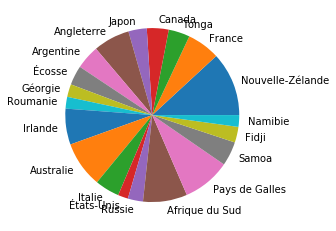

In [9]:
cam = plt.pie(points,labels=pays)